# Sift ALGO



In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
img=cv2.imread("/content/girl.png")
RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
sift=cv2.SIFT_create()

In [4]:
keypoints, descriptors = sift.detectAndCompute(RGB,None)

In [5]:
n = 80
keypoints = sorted(keypoints, key=lambda x: -x.response)[:n]

Number of keypoints detected: 80
descriptors Shape: (894, 128)
Keypoints Shape: < cv2.KeyPoint 0x785189da4ff0>


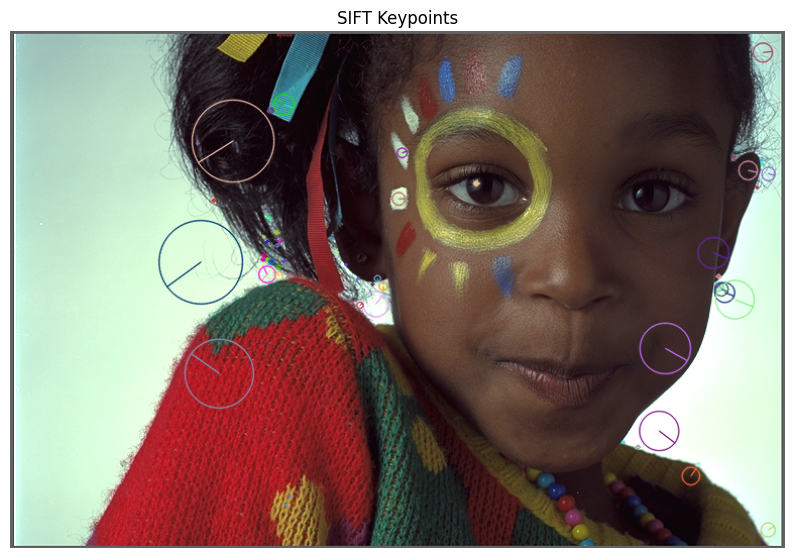

In [6]:
print("Number of keypoints detected:", len(keypoints))
print("descriptors Shape:", descriptors.shape)
print("Keypoints Shape:", keypoints[0])

img_sift = cv2.drawKeypoints(RGB, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.title("SIFT Keypoints")
plt.axis("off")
plt.imshow(img_sift)

In [7]:
img2 = cv2.resize(RGB,(300,500))

In [8]:
keypoints11, descriptors11 = sift.detectAndCompute(img2,None)

In [9]:
n = 80
keypoints = sorted(keypoints, key=lambda x: -x.response)[:n]

Number of keypoints detected: 80
descriptors Shape: (894, 128)
Keypoints Shape: < cv2.KeyPoint 0x785189da4ff0>


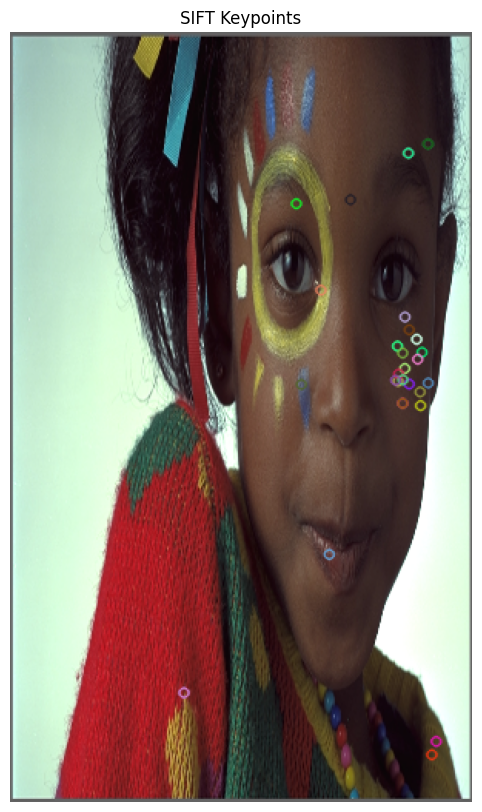

In [10]:
print("Number of keypoints detected:", len(keypoints))
print("descriptors Shape:", descriptors.shape)
print("Keypoints Shape:", keypoints[0])

img_sift = cv2.drawKeypoints(img2, keypoints, None)
plt.figure(figsize=(10,10))
plt.title("SIFT Keypoints")
plt.axis("off")
plt.imshow(img_sift)

In [11]:
import imutils
rotated = imutils.rotate_bound(RGB, 45)

In [12]:
keypoints2, descriptors2 = sift.detectAndCompute(rotated,None)

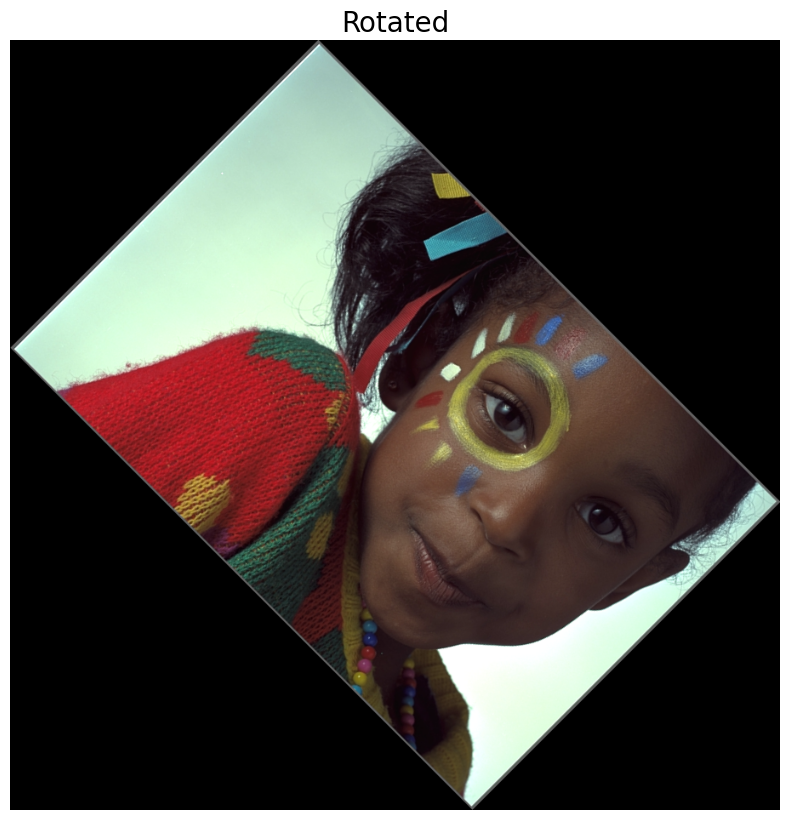

In [13]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Rotated", fontsize=20)
plt.imshow(rotated)

In [14]:
eye_crop = RGB[120:220,380:500]

In [15]:
keypoints3, descriptors3 = sift.detectAndCompute(eye_crop,None)

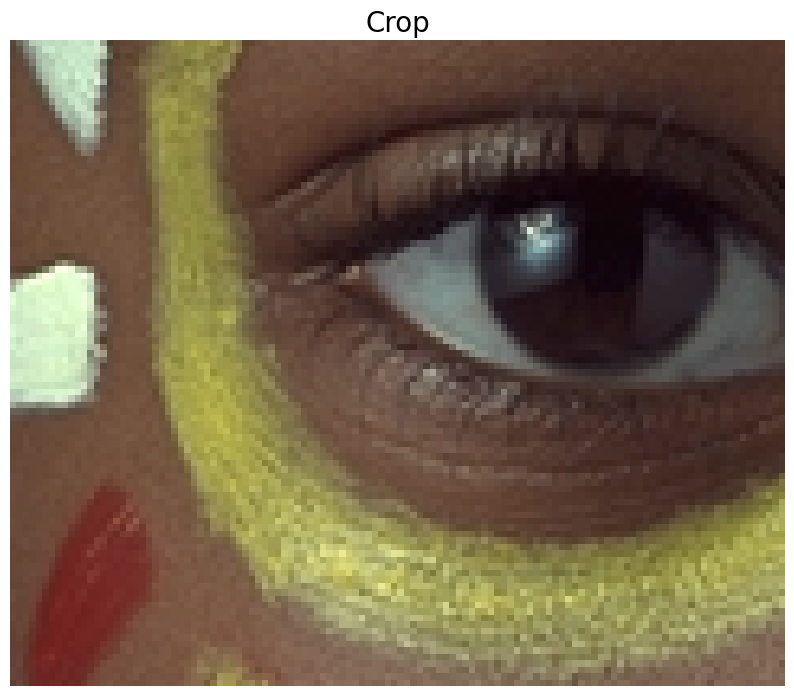

In [16]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Crop", fontsize=20)
plt.imshow(eye_crop)

In [18]:
bf = cv2.BFMatcher()
matches1_3 = bf.match(descriptors,descriptors2)
matches1_4 = bf.match(descriptors,descriptors3)

matches1_3 = sorted(matches1_3,key=lambda val: val.distance)
matches1_4 = sorted(matches1_4,key=lambda val: val.distance)

In [19]:
keypoints, descriptors = sift.detectAndCompute(img, None)   # main image
keypoints1, descriptors1 = sift.detectAndCompute(img2, None)
keypoints2, descriptors2 = sift.detectAndCompute(rotated, None)
keypoints3, descriptors3 = sift.detectAndCompute(eye_crop, None)

In [20]:
def draw_matches(imgA, kpA, imgB, kpB, matches):
    valid = [m for m in matches if m.queryIdx < len(kpA) and m.trainIdx < len(kpB)]
    return cv2.drawMatches(imgA, kpA, imgB, kpB, valid, None)

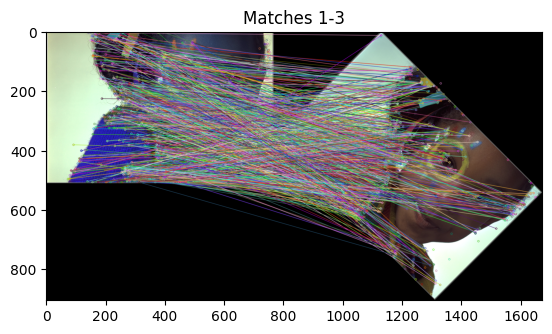

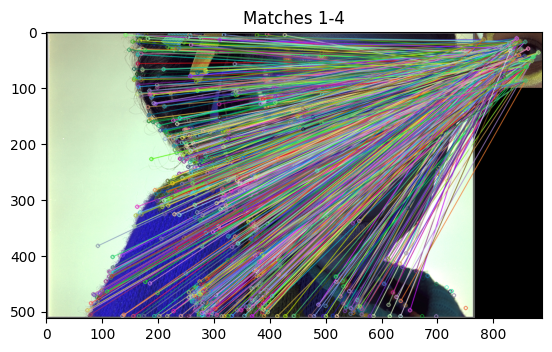

In [21]:
# 1 vs 3
img1_3_matches = draw_matches(img, keypoints, rotated, keypoints2, matches1_3)
plt.imshow(img1_3_matches)
plt.title("Matches 1-3")
plt.show()

# 1 vs 4
img1_4_matches = draw_matches(img, keypoints, eye_crop, keypoints3, matches1_4)
plt.imshow(img1_4_matches)
plt.title("Matches 1-4")
plt.show()

In [22]:
img=cv2.imread("/content/shutterstock_1877631178-600x600.jpg")
RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [23]:
sift=cv2.SIFT_create()

In [24]:
keypoints, descriptors = sift.detectAndCompute(RGB,None)

In [25]:
n = 80
keypoints = sorted(keypoints, key=lambda x: -x.response)[:n]

Number of keypoints detected: 80
descriptors Shape: (203, 128)
Keypoints Shape: < cv2.KeyPoint 0x7851881696e0>


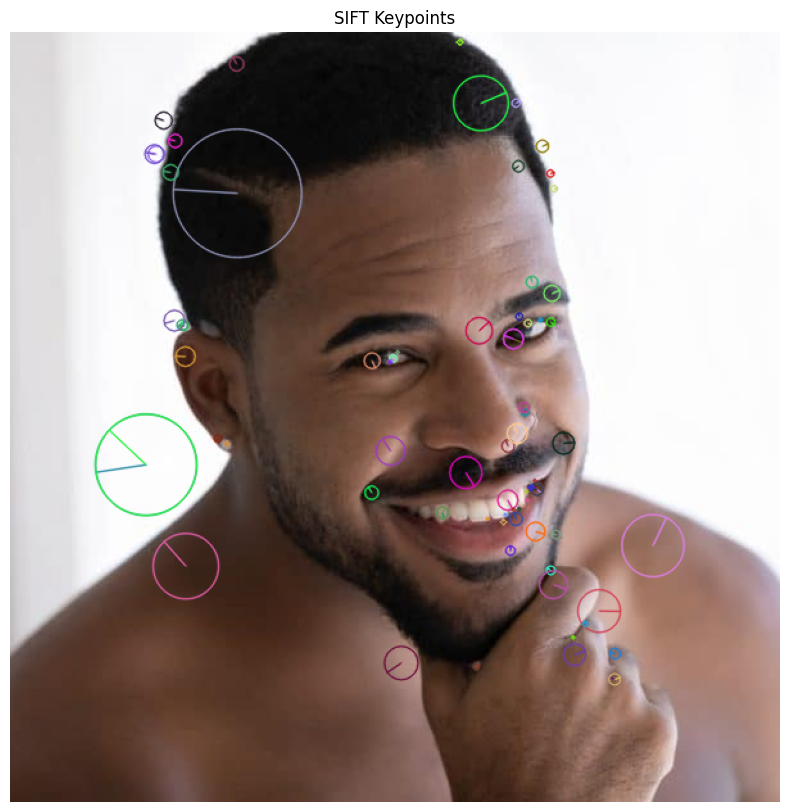

In [26]:
print("Number of keypoints detected:", len(keypoints))
print("descriptors Shape:", descriptors.shape)
print("Keypoints Shape:", keypoints[0])

img_sift = cv2.drawKeypoints(RGB, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.title("SIFT Keypoints")
plt.axis("off")
plt.imshow(img_sift)

In [27]:
img2 = cv2.resize(RGB,(300,500))

In [28]:
keypoints1, descriptors1 = sift.detectAndCompute(img2,None)

In [29]:
n = 80
keypoints = sorted(keypoints, key=lambda x: -x.response)[:n]

Number of keypoints detected: 80
descriptors Shape: (203, 128)
Keypoints Shape: < cv2.KeyPoint 0x7851881696e0>


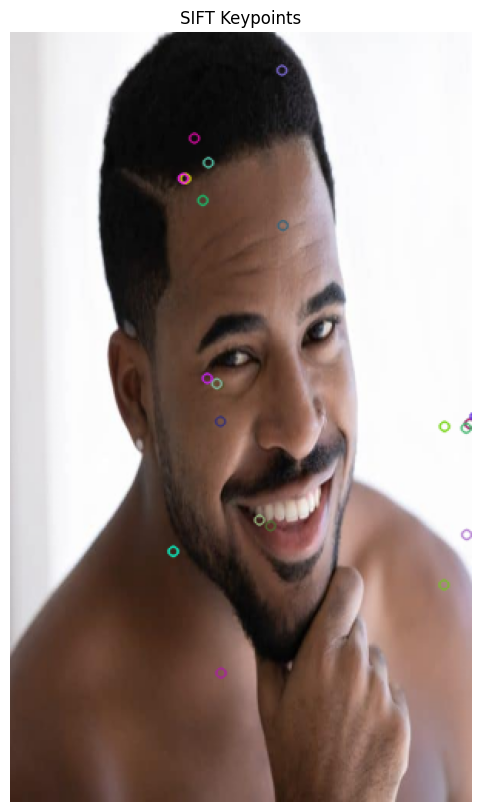

In [30]:
print("Number of keypoints detected:", len(keypoints))
print("descriptors Shape:", descriptors.shape)
print("Keypoints Shape:", keypoints[0])

img_sift = cv2.drawKeypoints(img2, keypoints, None)
plt.figure(figsize=(10,10))
plt.title("SIFT Keypoints")
plt.axis("off")
plt.imshow(img_sift)

In [31]:
import imutils
rotated = imutils.rotate_bound(RGB, 45)

In [32]:
keypoints21, descriptors21 = sift.detectAndCompute(rotated,None)


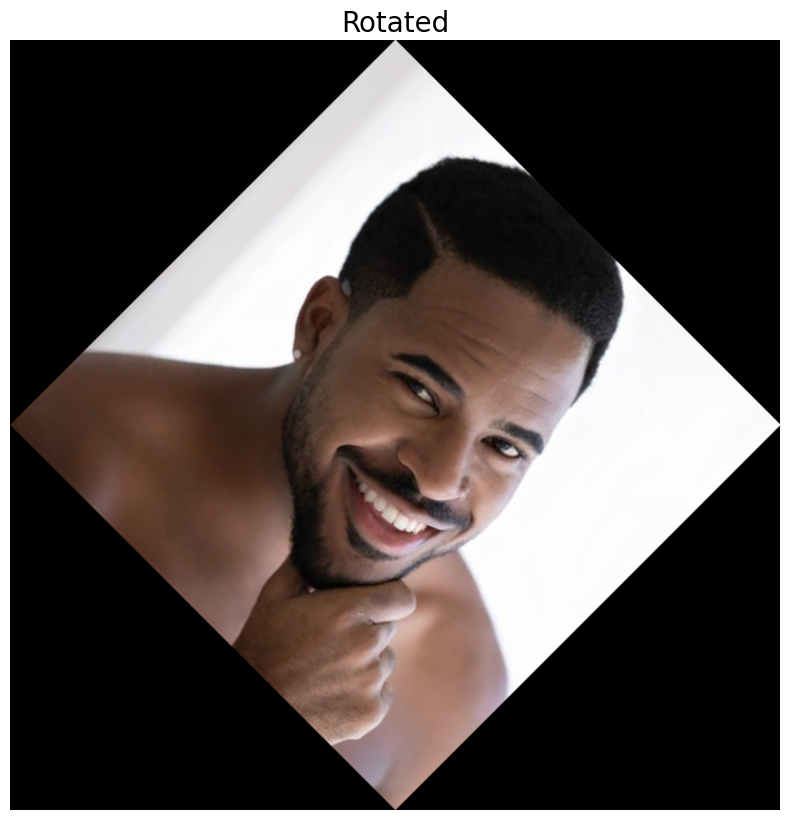

In [33]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Rotated", fontsize=20)
plt.imshow(rotated)

In [34]:
eye_crop = RGB[120:220,380:500]

In [35]:
keypoints31, descriptors31 = sift.detectAndCompute(eye_crop,None)

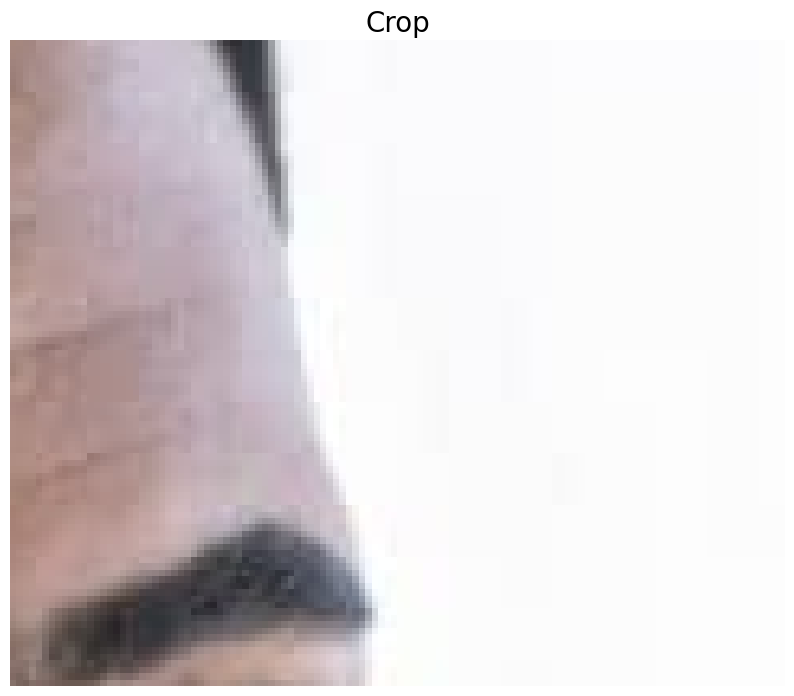

In [36]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Crop", fontsize=20)
plt.imshow(eye_crop)

In [38]:
keypoints, descriptors = sift.detectAndCompute(img, None)
keypoints11, descriptors11 = sift.detectAndCompute(img2, None)
keypoints21, descriptors21 = sift.detectAndCompute(rotated, None)
keypoints31, descriptors31 = sift.detectAndCompute(eye_crop, None)

# Ensure descriptors are valid and float32
def ensure_des(des):
    if des is None:
        return np.array([], dtype=np.float32).reshape(0, 128)  # empty
    return des.astype(np.float32)

des1 = ensure_des(descriptors)
des2 = ensure_des(descriptors11)
des3 = ensure_des(descriptors21)
des4 = ensure_des(descriptors31)

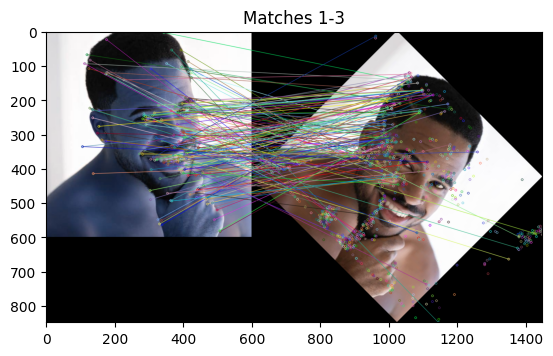

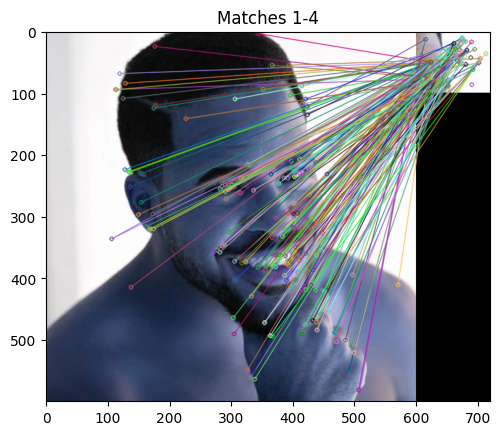

In [40]:
# 1 vs 3
img1_3_matches = draw_matches(img, keypoints, rotated, keypoints2, matches1_3)
plt.imshow(img1_3_matches)
plt.title("Matches 1-3")
plt.show()

# 1 vs 4
img1_4_matches = draw_matches(img, keypoints, eye_crop, keypoints3, matches1_4)
plt.imshow(img1_4_matches)
plt.title("Matches 1-4")
plt.show()

CONCLUSION:

SIFT is used to detect the location of keypoints and their corresponding discriptors.

The image is modified by reducing the size, rotating and croping the original image.

Brute force matcher is used to determine or to find the matching keypoints which have minimum ecludian distance.

The matched images show that most of the keypoints are correct matches and some of them are false matches.

False matches are there because the discriptor of  false matches have same values